# Plots for 3 contrast maps

In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import nibabel as nb
import numpy as np
import Functional_Fusion.plot as fpl
import Functional_Fusion.atlas_map as am
import nitools as nt
con_dir= '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLDMNI/data/group_avg'
fig_dir =  '/Users/jdiedrichsen/Dropbox/Talks/2024/12_UTSW'

In [3]:
at,_ = am.get_atlas('MNISymDentate1')
A = nb.load(f'{fig_dir}/cond_dentate_handedness_Tstat.dscalar.nii')
B = nb.load(f'{fig_dir}/condavg_dentate_Tstat.dscalar.nii')
B.header.get_axis(0).name
data1 = A.get_fdata()
data2 = B.get_fdata()   

In [ ]:
# The problem is that the order of coordinates in the Dentate1 atlas (functional fusion)
# does not match the order of the coordinates in the dscalar file.
coord1= at.world
# Get coordinates in voxels and transform to world coordinates
coord2 = nt.affine_transform_mat(A.header.get_axis(1).voxel.T,A.header.get_axis(1).affine)
print(coord1[:,1:10])
print(coord2[:,1:10])


[[-22. -22. -22. -22. -22. -22. -22. -22. -22.]
 [-62. -62. -61. -61. -61. -61. -60. -60. -60.]
 [-39. -38. -40. -39. -38. -37. -40. -39. -38.]]
[[-18. -17. -16.  16.  17.  18.  19. -20. -19.]
 [-61. -61. -61. -61. -61. -61. -61. -60. -60.]
 [-42. -42. -42. -42. -42. -42. -42. -42. -42.]]


In [ ]:
# One way to solve this is to read the scalar file with the atlas
data1 = at.read_data(f'{fig_dir}/cond_dentate_handedness_Tstat.dscalar.nii').T
data2 = at.read_data(f'{fig_dir}/condavg_dentate_Tstat.dscalar.nii').T

/Users/jdiedrichsen/opt/miniconda3/lib/python3.11/site-packages/nilearn/plotting/img_plotting.py:238: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  data = safe_get_data(img, ensure_finite=True)


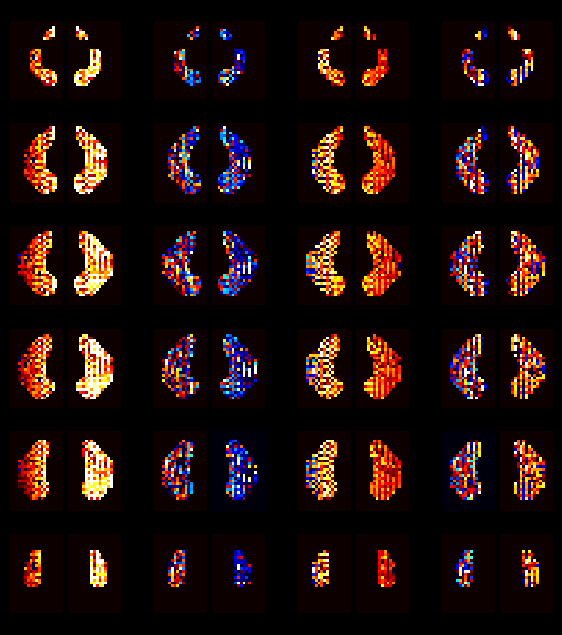

In [4]:
fig = plt.figure(figsize=(7,8),facecolor='black')
outer_grid = fig.add_gridspec(1,4,hspace=0,wspace=0.3)
inner_grid = outer_grid[0].subgridspec(6,2,hspace=0.0,wspace=0.1)
ax = fpl.plot_dentate(data2[2],gridspec = inner_grid,cscale=[-3,3]) # Finger movements
inner_grid = outer_grid[1].subgridspec(6,2,hspace=0.0,wspace=0.1)
ax= fpl.plot_dentate(data1[0],gridspec = inner_grid,cscale=[-2,2]) # L>R
inner_grid = outer_grid[2].subgridspec(6,2,hspace=0.0,wspace=0.1)
ax= fpl.plot_dentate(data2[7],gridspec = inner_grid,cscale=[-4,4])  # Foot Movement
inner_grid = outer_grid[3].subgridspec(6,2,hspace=0.0,wspace=0.1)
ax= fpl.plot_dentate(data2[4],gridspec = inner_grid,cscale=[-3,3]) # Theory of Mind

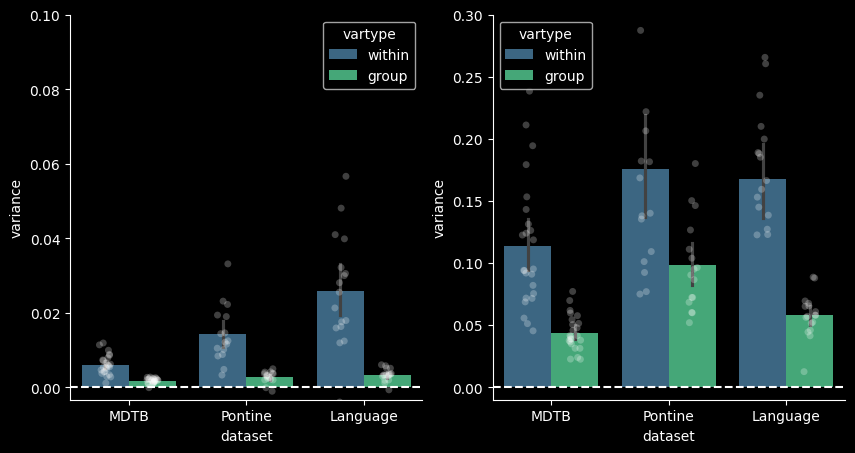

In [47]:
pal = [[1,1,1],[1,1,1]]
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = T[T.atlas=='MNISymDentate1']
ax=sb.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB','Pontine','Language'],hue_order=['within','group'],palette='viridis')
sb.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB','Pontine','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.0033,0.1)
plt.subplot(1,2,2)
X = T[T.atlas=='MNISymCereb2']
ax=sb.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB','Pontine','Language'],hue_order=['within','group'],palette='viridis')
sb.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB','Pontine','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
plt.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.01,0.3)

plt.savefig(f"{fig_dir}/variance_decomp.pdf")
